In [1]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#load csv
housing = pd.read_csv("Housing_Price_Data.csv")
print(housing.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [3]:
#understand shape
housing.shape

(545, 13)

In [4]:
#understand data types
housing.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [5]:
#Summary Statistics
#Summary Stats for Numerical Columns
pd.set_option('display.float_format', '{:.2f}'.format)
housing.describe()


,price,area,bedrooms,bathrooms,stories,parking
count,545.00,545.00,545.00,545.00,545.00,545.00
mean,4766729.25,5150.54,2.97,1.29,1.81,0.69
std,1870439.62,2170.14,0.74,0.50,0.87,0.86
min,1750000.00,1650.00,1.00,1.00,1.00,0.00
25%,3430000.00,3600.00,2.00,1.00,1.00,0.00
50%,4340000.00,4600.00,3.00,1.00,2.00,0.00
75%,5740000.00,6360.00,3.00,2.00,2.00,1.00
max,13300000.00,16200.00,6.00,4.00,4.00,3.00


In [6]:
#Summary Stats for Categorical Data
#Unique values in categorical data columns
for column in housing.columns:
    if housing[column].dtype == 'object':
        print(f"Unique values in column {column}: {housing[column].unique()}")
    

Unique values in column mainroad: ['yes' 'no']
Unique values in column guestroom: ['no' 'yes']
Unique values in column basement: ['no' 'yes']
Unique values in column hotwaterheating: ['no' 'yes']
Unique values in column airconditioning: ['yes' 'no']
Unique values in column prefarea: ['yes' 'no']
Unique values in column furnishingstatus: ['furnished' 'semi-furnished' 'unfurnished']


In [7]:
#Summary Statistics for Categorical Data
for column in housing.columns:
    if housing[column].dtype == 'object':
        print(f"Total count of values in column: {housing[column].value_counts()}")

Total count of values in column: mainroad
yes    468
no      77
Name: count, dtype: int64
Total count of values in column: guestroom
no     448
yes     97
Name: count, dtype: int64
Total count of values in column: basement
no     354
yes    191
Name: count, dtype: int64
Total count of values in column: hotwaterheating
no     520
yes     25
Name: count, dtype: int64
Total count of values in column: airconditioning
no     373
yes    172
Name: count, dtype: int64
Total count of values in column: prefarea
no     417
yes    128
Name: count, dtype: int64
Total count of values in column: furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64


In [8]:
#Determine if there are any missing values:
housing.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [9]:
#Correlation Analysis
#I want to create a heat map, so I'll have to go ahead and create some dummies 
#loop through categorical columns to convert to dummies

#initialize dummy df
housing_dummies = pd.DataFrame()

#pull list of categorical data columns, to be used later....
categorical_cols = housing.select_dtypes(include=['object']).columns

for column in housing:
        #create dummy variables
        dummies = pd.get_dummies(housing[column], prefix=column, drop_first=True)
        #concatenate dummies to new dataframe
        housing_dummies = pd.concat([housing_dummies, dummies], axis=1)

print(housing_dummies.head())

   price_1767150  price_1820000  price_1855000  price_1890000  price_1960000  \
0          False          False          False          False          False   
1          False          False          False          False          False   
2          False          False          False          False          False   
3          False          False          False          False          False   
4          False          False          False          False          False   

   price_2100000  price_2135000  price_2233000  price_2240000  price_2275000  \
0          False          False          False          False          False   
1          False          False          False          False          False   
2          False          False          False          False          False   
3          False          False          False          False          False   
4          False          False          False          False          False   

   ...  guestroom_yes  basement_yes  h

In [10]:
#create new df
#set equal to housing to create a clone of original df
housing_final = housing
#drop categorical columns, concat dummies with final df
housing_final = pd.concat([housing_final.drop(categorical_cols, axis=1), housing_dummies], axis=1)

print(housing_final)

        price  area  bedrooms  bathrooms  stories  parking  price_1767150  \
0    13300000  7420         4          2        3        2          False   
1    12250000  8960         4          4        4        3          False   
2    12250000  9960         3          2        2        2          False   
3    12215000  7500         4          2        2        3          False   
4    11410000  7420         4          1        2        2          False   
..        ...   ...       ...        ...      ...      ...            ...   
540   1820000  3000         2          1        1        2          False   
541   1767150  2400         3          1        1        0           True   
542   1750000  3620         2          1        1        0          False   
543   1750000  2910         3          1        1        0          False   
544   1750000  3850         3          1        2        0          False   

     price_1820000  price_1855000  price_1890000  ...  guestroom_yes  \
0  

In [14]:
housing_final.dtypes

price                              int64
area                               int64
bedrooms                           int64
bathrooms                          int64
stories                            int64
                                   ...  
parking_2                           bool
parking_3                           bool
prefarea_yes                        bool
furnishingstatus_semi-furnished     bool
furnishingstatus_unfurnished        bool
Length: 529, dtype: object

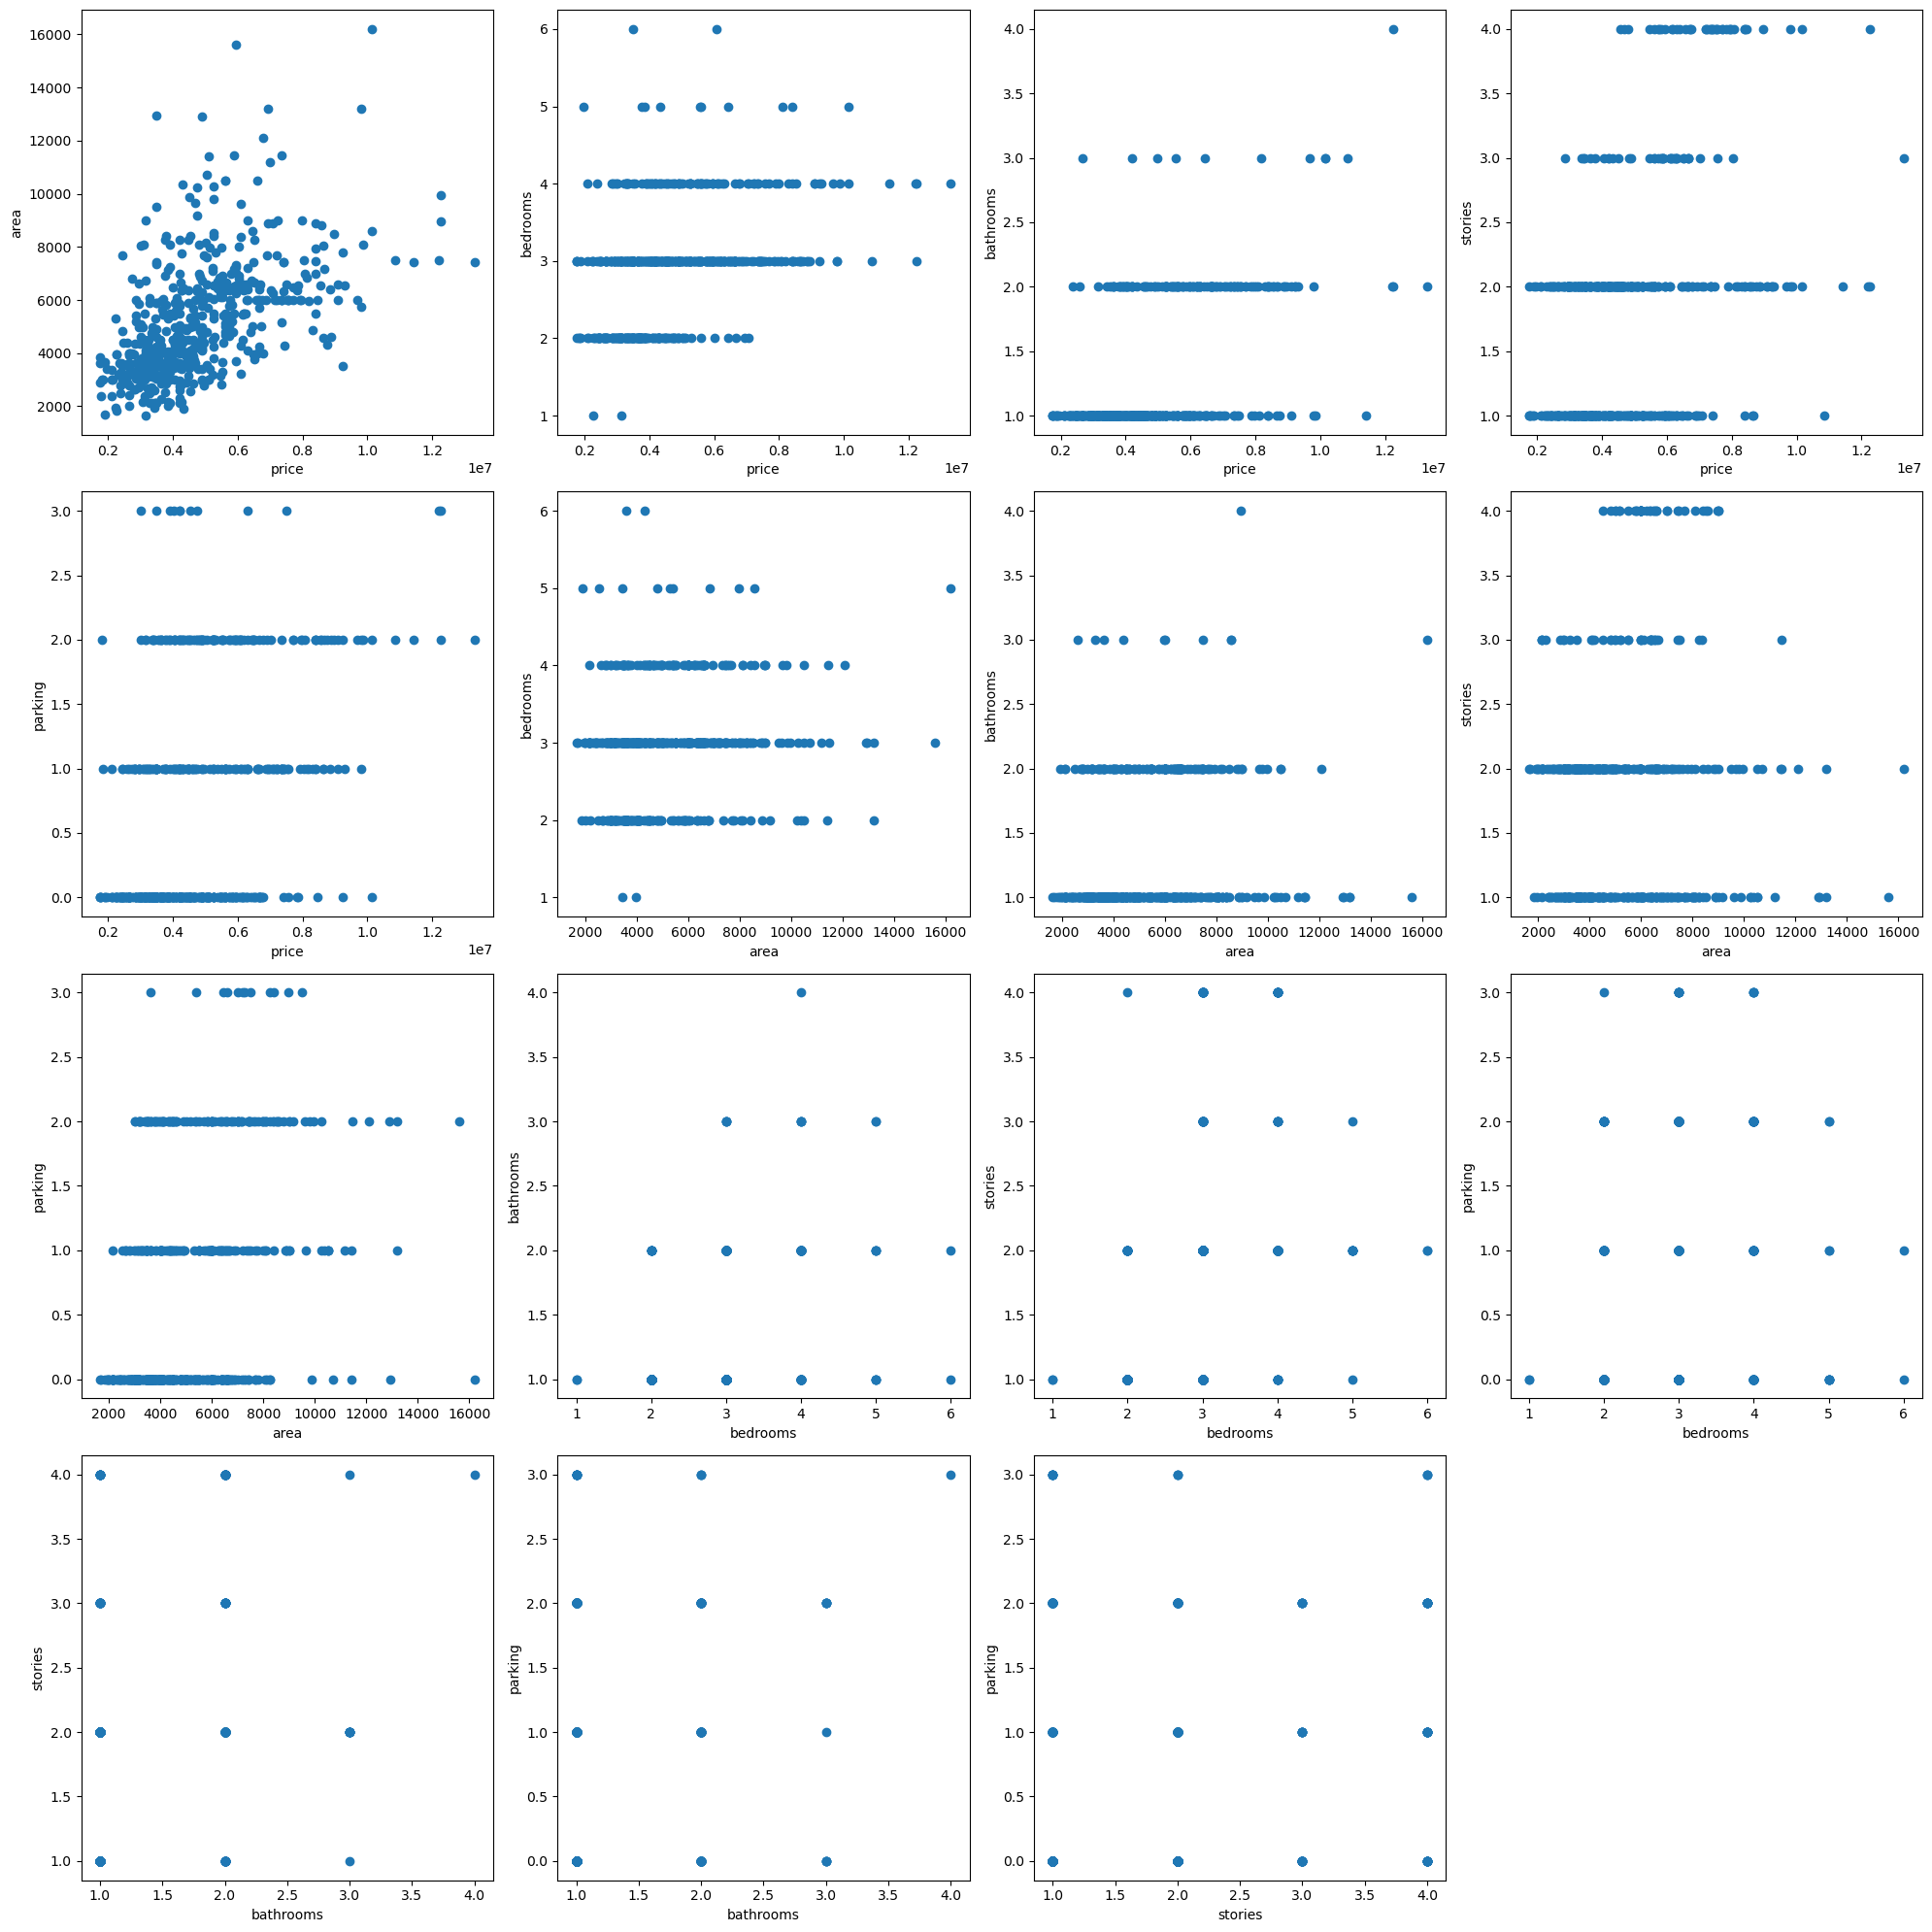

In [35]:
# Select only numerical columns for simplicity
numerical_cols = housing_final.select_dtypes(include=['number']).columns

# Calculate the total number of plots needed
n_plots = len(numerical_cols) * (len(numerical_cols) - 1) // 2

# Determine the number of rows/columns for the subplot grid
# Here, we're creating a grid that's as square as possible
n = int(n_plots ** 0.5) + (1 if n_plots % n_plots**0.5 else 0)

fig, ax = plt.subplots(n, n, figsize=(n*5, n*5))
plt.subplots_adjust(hspace=0.4, wspace=0.4) # Adjust spacing to prevent label overlap

# Tracker for the current subplot index
plot_idx = 0
for i, col1 in enumerate(numerical_cols):
    for j, col2 in enumerate(numerical_cols[i+1:], start=i+1):
        # Calculate current subplot row and column index
        row_idx, col_idx = divmod(plot_idx, n)
        
        ax[row_idx, col_idx].scatter(housing_final[col1], housing_final[col2])
        ax[row_idx, col_idx].set_xlabel(col1)
        ax[row_idx, col_idx].set_ylabel(col2)
        
        plot_idx += 1

# Hide unused subplots if any
for idx in range(plot_idx, n*n):
    fig.delaxes(ax.flatten()[idx])

plt.tight_layout()
plt.show()